In [322]:
%run ../modules.ipynb
len_dataset=79855
load_profile('egazzarr')
qb = QueryBuilder()
qb.append(orm.StructureData)
group=load_group('structures/unique')

In [249]:
select=7000
qb_red=random.sample(qb.all(), select)

In [250]:
# prec=np.linspace(0.01, 0.1, 3)
# angl=np.linspace(1, 10, 3)
# prec,angl
prec=[0.01, 0.1]
angl=[5,10]

In [251]:
#structures that change from magic to non magic when ajusting tolerance
data=[]
for j in prec:
    for k in angl:
        magic_count=0
        change_count=0
        error=0
        for [structure_data] in qb_red:
            py=structure_data.get_pymatgen()
            if len(py)%4==0:
                magic_count+=1  
            try:
                new=SA(py, symprec=j, angle_tolerance=k).find_primitive()
            except:
                error+=1
                pass
                if (len(new)!=len(py)) and len(new)%4!=0:
                    change_count+=1
        change_perc=change_count*100/magic_count
        error_perc=error*100/magic_count
        data.append([j,k,change_perc, error_perc])
        print("PRIMITIVE: ", str(change_perc), "+_",str(error_perc), 
              "% of structures change from magic to non magic with symprec = ", str(j), 
              "and angle_tol = ", str(k))
data_conv=[]
for j in prec:
    for k in angl:
        magic_count=0
        change_count=0
        error=0
        for [structure_data] in qb_red:
            py=structure_data.get_pymatgen()
            if len(py)%4==0:
                magic_count+=1  
            try:
                conv=SA(py, symprec=j, angle_tolerance=k).get_conventional_standard_structure(international_monoclinic=True)
            except:
                error+=1
                pass
                if (len(conv)!=len(py)) and len(new)%4!=0:
                    change_count+=1
        change_perc=change_count*100/magic_count
        error_perc=error*100/magic_count
        data_conv.append([j,k,change_perc, error_perc])
        print("CONVENTIONAL :", str(change_perc), "+_",str(error_perc), 
              "% of structures change from magic to non magic with symprec = ", str(j), 
              "and angle_tol = ", str(k))

PRIMITIVE:  0.0 +_ 0.0 % of structures change from magic to non magic with symprec =  0.01 and angle_tol =  5
PRIMITIVE:  0.0 +_ 0.0 % of structures change from magic to non magic with symprec =  0.01 and angle_tol =  10
PRIMITIVE:  0.16965584100824044 +_ 0.5089675230247213 % of structures change from magic to non magic with symprec =  0.1 and angle_tol =  5
PRIMITIVE:  0.16965584100824044 +_ 0.5089675230247213 % of structures change from magic to non magic with symprec =  0.1 and angle_tol =  10


/home/egazzarrini/miniconda3/envs/aiida/lib/python3.8/site-packages/pymatgen/core/periodic_table.py:203: UserWarning: No electronegativity for He. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.
  warnings.warn(


CONVENTIONAL : 0.0 +_ 0.0 % of structures change from magic to non magic with symprec =  0.01 and angle_tol =  5
CONVENTIONAL : 0.0 +_ 0.0 % of structures change from magic to non magic with symprec =  0.01 and angle_tol =  10
CONVENTIONAL : 0.5089675230247213 +_ 0.5089675230247213 % of structures change from magic to non magic with symprec =  0.1 and angle_tol =  5
CONVENTIONAL : 0.5089675230247213 +_ 0.5089675230247213 % of structures change from magic to non magic with symprec =  0.1 and angle_tol =  10


In [264]:
data


array([[  0.01      ,   5.        ,   0.        ,   0.        ],
       [  0.01      ,  10.        ,   0.        ,   0.        ],
       [  0.1       ,   5.        ,   0.16965584,   0.50896752],
       [  0.1       ,  10.        ,   0.16965584,   0.50896752]])

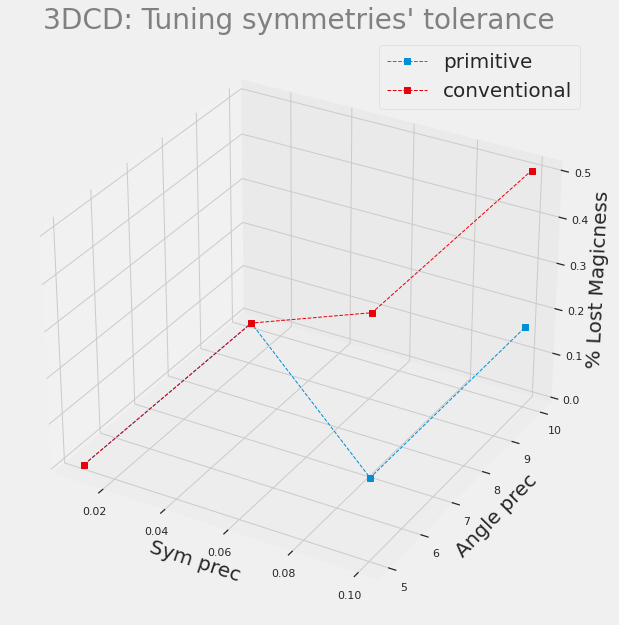

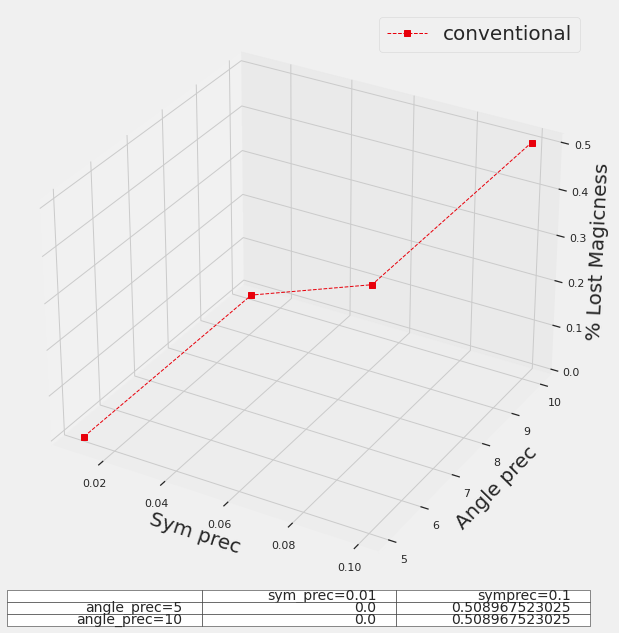

In [323]:
data=np.array(data)
data_conv=np.array(data_conv)

table = [['', 'sym_prec=0.01', 'symprec=0.1'], 
         ['angle_prec=5', data[0,2], data[2,2]],
         ['angle_prec=10',data[1,2], data[3,2]]]
         
table_conv = [['', 'sym_prec=0.01', 'symprec=0.1'], 
         ['angle_prec=5', data_conv[0,2], data_conv[2,2]],
         ['angle_prec=10',data_conv[1,2], data_conv[3,2]]]

plt.style.use('fivethirtyeight')
ax = plt.figure(figsize=(12,10)).add_subplot(projection='3d')
ax.plot(data[:,0], data[:,1], data[:,2],  linestyle='dashed', 
        marker='s', linewidth=1, label='primitive')
ax.plot(data_conv[:,0], data_conv[:,1], data_conv[:,2],  linestyle='dashed', 
        marker='s', linewidth=1, label='conventional', color='r')
ax.set_xlabel("Sym prec", size=20)
ax.set_ylabel("Angle prec", size=20)
ax.set_zlabel("% Lost Magicness", size=20)
ax.legend(fontsize=20)
ax.set_title("3DCD: Tuning symmetries' tolerance", color='grey', size=28)
# ax.table(table, fontsize=20)

ax = plt.figure(figsize=(12,10)).add_subplot(projection='3d')
# ax.plot(data[:,0], data[:,1], data[:,2],  linestyle='dashed', 
#         marker='s', linewidth=1, label='primitive')
ax.plot(data_conv[:,0], data_conv[:,1], data_conv[:,2],  linestyle='dashed', 
        marker='s', linewidth=1, label='conventional', color='r')
ax.set_xlabel("Sym prec", size=20)
ax.set_ylabel("Angle prec", size=20)
ax.set_zlabel("% Lost Magicness", size=20)
ax.legend(fontsize=20)

ax.table(table_conv, fontsize=20)


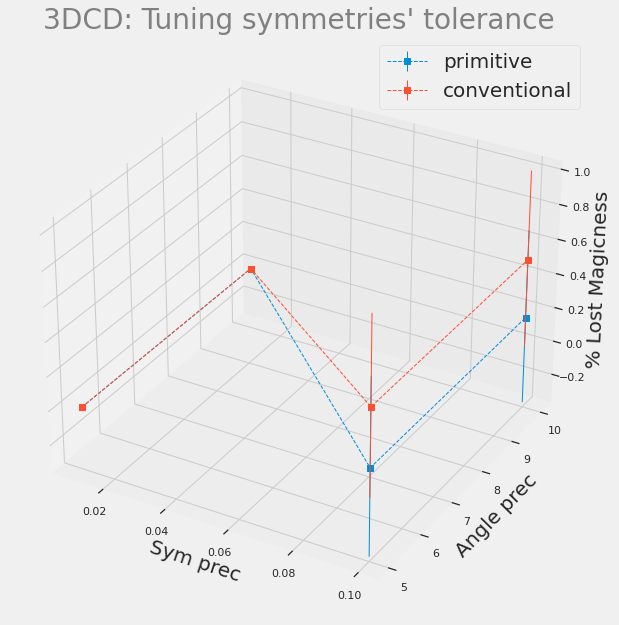

In [328]:
ax = plt.figure(figsize=(12,10)).add_subplot(projection='3d')
ax.errorbar(data[:,0], data[:,1], data[:,2],  data[:,3], linestyle='dashed', 
        marker='s', linewidth=1, label='primitive')
ax.errorbar(data_conv[:,0], data_conv[:,1], data_conv[:,2], data_conv[:,3],
            linestyle='dashed', marker='s', linewidth=1, label='conventional')
# ax.plot(data_conv[:,0], data_conv[:,1], data_conv[:,2],  linestyle='dashed', 
#         marker='s', linewidth=1, label='conventional', color='r')
ax.set_xlabel("Sym prec", size=20)
ax.set_ylabel("Angle prec", size=20)
ax.set_zlabel("% Lost Magicness", size=20)
ax.set_title("3DCD: Tuning symmetries' tolerance", color='grey', size=28)
ax.legend(fontsize=20)

In [ ]:
the_table = plt.table(cellText=cell_text,
                      rowLabels=row_headers,
                      rowColours=rcolors,
                      colLabels=column_headers,
                      loc='center')